In [1]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/content/FinalData.csv')

In [3]:
testing_Data=pd.read_csv('/content/FINALFORSURE.csv')

In [4]:
data

,SenderSubId,orderId,Account,Symbol,ordStatus,side,OrderQty,Price,LastShares,LastPx,lastMkt,TransactTime,timeStamp,MsgSeqNum,Cancelled,Fraud
0,JTOWTDA,106561171,3J1AK62E,NVCN,NEW,BUY,120000.0,0.050000,0,0.0,PTX,5/24/2018 7:00:00 AM,2018-05-24 07:25:39.077,0,0,0
1,JTOWTDA,106561173,3J1AK62E,NVCN,NEW,SELL SHORT,120000.0,0.060000,0,0.0,PTX,5/24/2018 7:00:00 AM,2018-05-24 07:25:39.093,1,0,0
2,JTSTMA2,7E53359-1-5,3J1AP14E,BBI,NEW,SELL,10000.0,0.385000,0,0.0,CDX,5/24/2018 7:00:24 AM,2018-05-24 07:25:39.093,2,0,0
3,JTOWTDA,106561174,3J1AK62E,NVCN,NEW,BUY,150000.0,0.045000,0,0.0,PTX,5/24/2018 7:00:00 AM,2018-05-24 07:25:39.093,3,0,0
4,JTOWTDA,106561176,3J1AK62E,SWY,NEW,BUY,12000.0,0.500000,0,0.0,PTX,5/24/2018 7:00:00 AM,2018-05-24 07:25:39.093,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24366,JTPOINT,8592,3J1AN90T,XAW,NEW,Sell,500.0,25.802124,0,0.0,PTX,2018-05-24 09:28:18 AM,2018-05-24 09:28:18.002,25782,0,1
24367,JTPOINT,8593,3J1AN90T,XAW,NEW,Sell,500.0,25.802124,0,0.0,PTX,2018-05-24 09:28:18 AM,2018-05-24 09:28:18.003,25783,0,1
24368,JTPOINT,8594,3J1AN90T,XAW,NEW,Sell,500.0,25.802124,0,0.0,PTX,2018-05-24 09:28:18 AM,2018-05-24 09:28:18.004,25784,0,1
24369,JTPOINT,8595,3J1AN90T,XAW,NEW,Sell,500.0,25.802124,0,0.0,PTX,2018-05-24 09:28:18 AM,2018-05-24 09:28:18.005,25785,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24371 entries, 0 to 24370
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SenderSubId   24371 non-null  object 
 1   orderId       24371 non-null  object 
 2   Account       24371 non-null  object 
 3   Symbol        24365 non-null  object 
 4   ordStatus     24371 non-null  object 
 5   side          24371 non-null  object 
 6   OrderQty      24317 non-null  float64
 7   Price         24317 non-null  float64
 8   LastShares    24371 non-null  int64  
 9   LastPx        24371 non-null  float64
 10  lastMkt       24371 non-null  object 
 11  TransactTime  24371 non-null  object 
 12  timeStamp     24371 non-null  object 
 13  MsgSeqNum     24371 non-null  int64  
 14  Cancelled     24371 non-null  int64  
 15  Fraud         24371 non-null  int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 3.0+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OrderQty,24317.0,24898.041452,124969.207340,99.0,500.00,2500.00,15500.000000,14759000.00
Price,24317.0,10.564240,17.926283,0.0,0.07,0.55,25.802124,810.90
LastShares,24371.0,10.910508,509.849998,0.0,0.00,0.00,0.000000,51000.00
LastPx,24371.0,0.020669,0.732954,0.0,0.00,0.00,0.000000,40.22
MsgSeqNum,24371.0,12512.926798,7483.024866,0.0,6092.50,12185.00,18277.500000,25786.00
Cancelled,24371.0,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.00
Fraud,24371.0,0.294818,0.455970,0.0,0.00,0.00,1.000000,1.00


In [7]:
#See if we have NAN values 
#if it displays False means there is no NAN values
#If it displays True, means there is a NAN values
data. isna(). any()

SenderSubId     False
orderId         False
Account         False
Symbol           True
ordStatus       False
side            False
OrderQty         True
Price            True
LastShares      False
LastPx          False
lastMkt         False
TransactTime    False
timeStamp       False
MsgSeqNum       False
Cancelled       False
Fraud           False
dtype: bool

In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24311 entries, 0 to 24370
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SenderSubId   24311 non-null  object 
 1   orderId       24311 non-null  object 
 2   Account       24311 non-null  object 
 3   Symbol        24311 non-null  object 
 4   ordStatus     24311 non-null  object 
 5   side          24311 non-null  object 
 6   OrderQty      24311 non-null  float64
 7   Price         24311 non-null  float64
 8   LastShares    24311 non-null  int64  
 9   LastPx        24311 non-null  float64
 10  lastMkt       24311 non-null  object 
 11  TransactTime  24311 non-null  object 
 12  timeStamp     24311 non-null  object 
 13  MsgSeqNum     24311 non-null  int64  
 14  Cancelled     24311 non-null  int64  
 15  Fraud         24311 non-null  int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 3.2+ MB


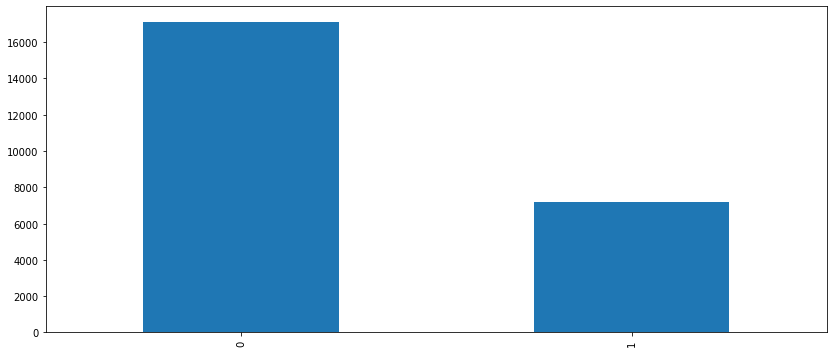

In [10]:
ax=data['Fraud'].value_counts().plot(kind='bar',figsize=(14,6))

In [11]:
#our Label
data.Fraud.value_counts(normalize=True)*100

0    70.445477
1    29.554523
Name: Fraud, dtype: float64

In [12]:
#Re-check 
data. isna(). any()

SenderSubId     False
orderId         False
Account         False
Symbol          False
ordStatus       False
side            False
OrderQty        False
Price           False
LastShares      False
LastPx          False
lastMkt         False
TransactTime    False
timeStamp       False
MsgSeqNum       False
Cancelled       False
Fraud           False
dtype: bool

# **Remove the unuseful columns**

In [13]:
del data['Account']
del data['Symbol']
del data ['LastShares']
del data ['LastPx']
del data ['lastMkt']
del data ['timeStamp']
del data ['MsgSeqNum']
del data['Cancelled']

In [14]:
data

,SenderSubId,orderId,ordStatus,side,OrderQty,Price,TransactTime,Fraud
0,JTOWTDA,106561171,NEW,BUY,120000.0,0.050000,5/24/2018 7:00:00 AM,0
1,JTOWTDA,106561173,NEW,SELL SHORT,120000.0,0.060000,5/24/2018 7:00:00 AM,0
2,JTSTMA2,7E53359-1-5,NEW,SELL,10000.0,0.385000,5/24/2018 7:00:24 AM,0
3,JTOWTDA,106561174,NEW,BUY,150000.0,0.045000,5/24/2018 7:00:00 AM,0
4,JTOWTDA,106561176,NEW,BUY,12000.0,0.500000,5/24/2018 7:00:00 AM,0
...,...,...,...,...,...,...,...,...
24366,JTPOINT,8592,NEW,Sell,500.0,25.802124,2018-05-24 09:28:18 AM,1
24367,JTPOINT,8593,NEW,Sell,500.0,25.802124,2018-05-24 09:28:18 AM,1
24368,JTPOINT,8594,NEW,Sell,500.0,25.802124,2018-05-24 09:28:18 AM,1
24369,JTPOINT,8595,NEW,Sell,500.0,25.802124,2018-05-24 09:28:18 AM,1


In [15]:
data.shape

(24311, 8)

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OrderQty,24311.0,24904.030028,124984.046846,99.0,500.00,2500.00,15500.000000,14759000.0
Price,24311.0,10.566847,17.927726,0.0,0.07,0.55,25.802124,810.9
Fraud,24311.0,0.295545,0.456297,0.0,0.00,0.00,1.000000,1.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24311 entries, 0 to 24370
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SenderSubId   24311 non-null  object 
 1   orderId       24311 non-null  object 
 2   ordStatus     24311 non-null  object 
 3   side          24311 non-null  object 
 4   OrderQty      24311 non-null  float64
 5   Price         24311 non-null  float64
 6   TransactTime  24311 non-null  object 
 7   Fraud         24311 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 1.7+ MB


# **Converting the side column to numerical values**

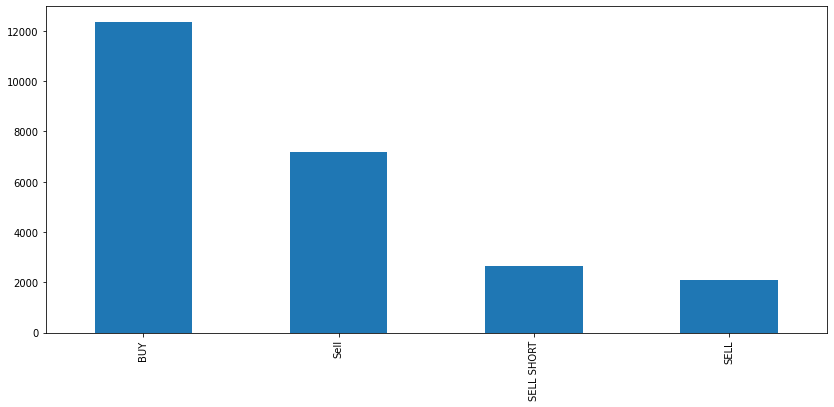

In [18]:
ax=data['side'].value_counts().plot(kind='bar',figsize=(14,6))

In [21]:
#Convert side to a numerical value
def side_to_numeric(x):
        if x=='SELL SHORT': return -1
        if x=='SELL':  return 0
        if x=='BUY': return 1
        if x=='sell': return 0

In [22]:
data['side_numerical']=data['side'].apply(side_to_numeric)

In [23]:
df = pd.DataFrame(data, columns=['SenderSubId','orderId','ordStatus','side','OrderQty','Price','TransactTime','side_numerical','Fraud'])

In [24]:
df.head()

,SenderSubId,orderId,ordStatus,side,OrderQty,Price,TransactTime,side_numerical,Fraud
0,JTOWTDA,106561171,NEW,BUY,120000.0,0.050,5/24/2018 7:00:00 AM,1.0,0
1,JTOWTDA,106561173,NEW,SELL SHORT,120000.0,0.060,5/24/2018 7:00:00 AM,-1.0,0
2,JTSTMA2,7E53359-1-5,NEW,SELL,10000.0,0.385,5/24/2018 7:00:24 AM,0.0,0
3,JTOWTDA,106561174,NEW,BUY,150000.0,0.045,5/24/2018 7:00:00 AM,1.0,0
4,JTOWTDA,106561176,NEW,BUY,12000.0,0.500,5/24/2018 7:00:00 AM,1.0,0


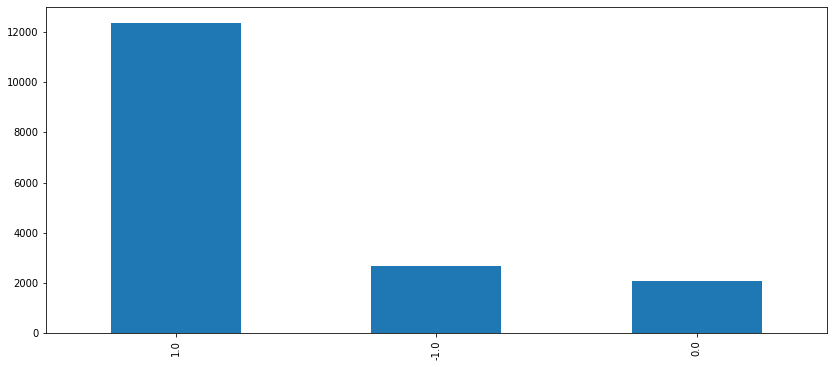

In [25]:
ax=data['side_numerical'].value_counts().plot(kind='bar',figsize=(14,6))

# **Converting the OrdStatus to Numerical values**

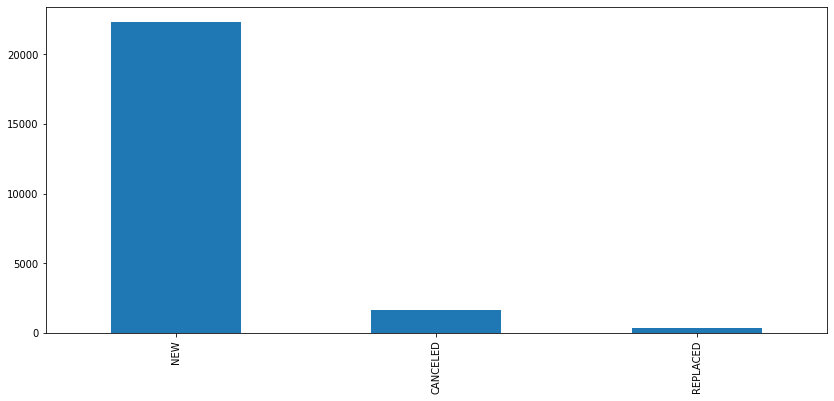

In [26]:
ax=df['ordStatus'].value_counts().plot(kind='bar',figsize=(14,6))

In [27]:
#Convert side to a numerical value
def ordStatus_to_numeric(x):
        if x=='NEW': return 1
        if x=='CANCELED':  return 0
        if x=='REPLACED':  return -1

In [28]:
df['ordStatus_numerical']=df['ordStatus'].apply(ordStatus_to_numeric)

In [29]:
df = pd.DataFrame(df, columns=['SenderSubId','orderId','ordStatus','side','OrderQty','Price','TransactTime','side_numerical','ordStatus_numerical','Fraud'])

In [30]:
df.head()

,SenderSubId,orderId,ordStatus,side,OrderQty,Price,TransactTime,side_numerical,ordStatus_numerical,Fraud
0,JTOWTDA,106561171,NEW,BUY,120000.0,0.050,5/24/2018 7:00:00 AM,1.0,1,0
1,JTOWTDA,106561173,NEW,SELL SHORT,120000.0,0.060,5/24/2018 7:00:00 AM,-1.0,1,0
2,JTSTMA2,7E53359-1-5,NEW,SELL,10000.0,0.385,5/24/2018 7:00:24 AM,0.0,1,0
3,JTOWTDA,106561174,NEW,BUY,150000.0,0.045,5/24/2018 7:00:00 AM,1.0,1,0
4,JTOWTDA,106561176,NEW,BUY,12000.0,0.500,5/24/2018 7:00:00 AM,1.0,1,0


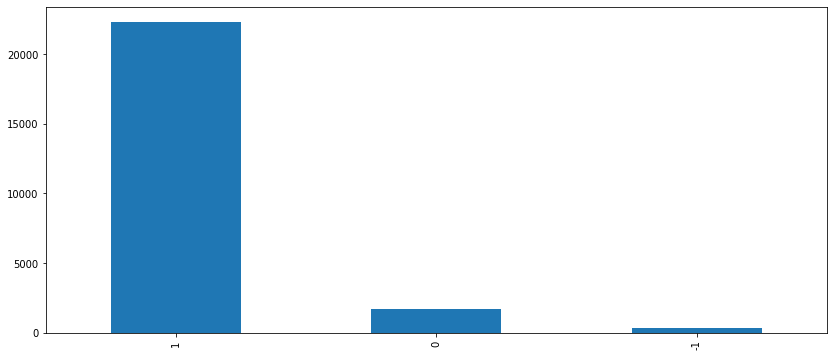

In [31]:
ax=df['ordStatus_numerical'].value_counts().plot(kind='bar',figsize=(14,6))

# **Plot the different sides**

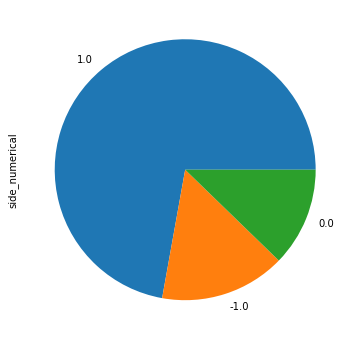

In [34]:
#show the different side : Buy, Sell short, Sell and SELL
df['side_numerical'].value_counts().plot(kind='pie', figsize=(10,6))

# **Plot the different senders**

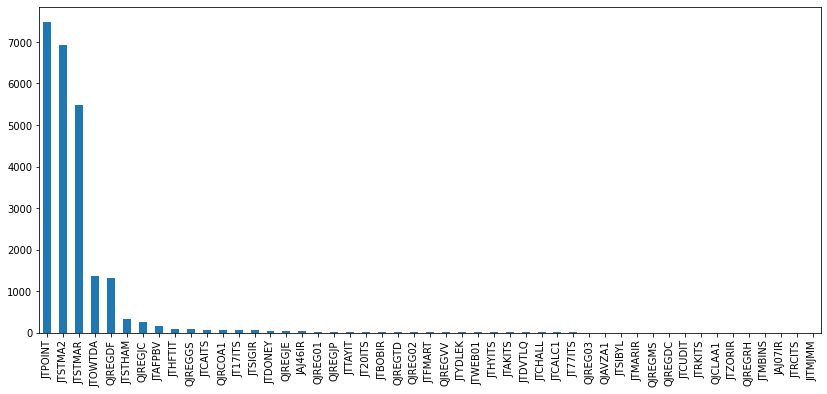

In [35]:
#show the different senders
ax = df['SenderSubId'].value_counts().plot(kind='bar', figsize=(14,6))

# **Group by SenderSubId and OrdStatus**

In [36]:
#First grouping based on "Team"
# Within each team we are grouping based on "Position"
count = df.groupby(['SenderSubId', 'ordStatus'])
  
# Print the first value in each group
count.first()

orderId        side  OrderQty   Price  \
SenderSubId ordStatus                                                    
JAJ07IR     NEW        IRESS_01MjE0PoQ|C         BUY    5000.0   0.560   
JAJ46IR     CANCELED    1099O1F1MjDIBqDO  SELL SHORT   10000.0   9.600   
            NEW         1099O1F1MjDIBqCO  SELL SHORT   10000.0   9.500   
JITMJMM     NEW         99XFI301lEvbfA|O        SELL   50500.0   0.395   
JT17ITS     NEW               1009I8NH.1  SELL SHORT     500.0  10.730   
...                                  ...         ...       ...     ...   
QJREGRH     NEW              2zDHW10_0Xz  SELL SHORT    2000.0   9.880   
QJREGTD     CANCELED         2zDHW10_0RN        SELL    4000.0   0.265   
            NEW              2zDHW10_0RN        SELL    4000.0   0.270   
QJREGVV     CANCELED         2z9Xt10_3Bj         BUY    3900.0  10.120   
            NEW                AOP1-65-1         BUY     500.0  38.500   

                               TransactTime  side_numerical  \
SenderSubId ordStatus                                         
JAJ07IR     NEW        5/24/2018 8:34:09 AM             1.0   
JAJ46IR     CANCELED   5/24/2018 9:11:05 AM            -1.0   
            NEW        5/24/2018 9:05:46 AM            -1.0   
JITMJMM     NEW        5/24/2018 8:46:45 AM             0.0   
JT17ITS     NEW        5/24/2018 8:14:57 AM            -1.0   
...                                     ...             ...   
QJREGRH     NEW        5/24/2018 9:17:32 AM            -1.0   
QJREGTD     CANCELED   5/24/2018 9:10:44 AM             0.0   
            NEW        5/24/2018 9:10:44 AM             0.0   
QJREGVV     CANCELED   5/24/2018 8:43:44 AM             1.0   
            NEW        5/24/2018 8:17:19 AM             1.0   

                       ordStatus_numerical  Fraud  
SenderSubId ordStatus                              
JAJ07IR     NEW                          1      0  
JAJ46IR     CANCELED                     0      0  
            NEW                          1      0  
JITMJMM     NEW                          1      0  
JT17ITS     NEW                          1      0  
...                                    ...    ...  
QJREGRH     NEW                          1      0  
QJREGTD     CANCELED                     0      0  
            NEW                          1      0  
QJREGVV     CANCELED                     0      0  
            NEW                          1      0  

[89 rows x 8 columns]

In [ ]:
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


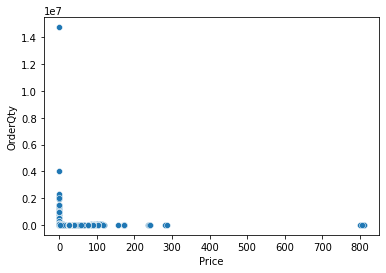

In [ ]:
sns.scatterplot(df['Price'], df['OrderQty'])

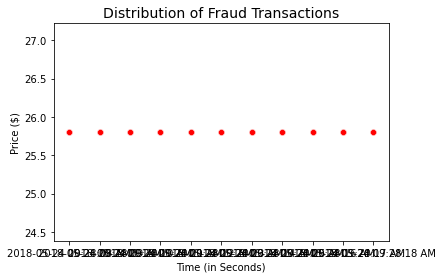

In [ ]:
ax = sns.scatterplot(data=df,x= df.TransactTime[df.Fraud == 1], y= df.Price[df.Fraud == 1], color='red')
ax.set_title('Distribution of Fraud Transactions', fontsize=14)

plt.xlabel('Time (in Seconds)')
plt.ylabel('Price ($)')
plt.show()

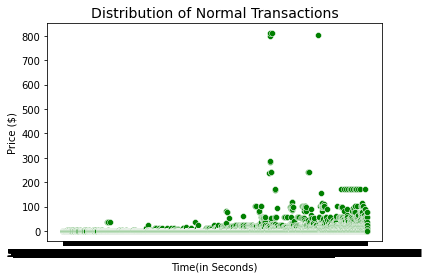

In [ ]:
ax = sns.scatterplot(data=df,x= df.TransactTime[df.Fraud == 0], y= df.Price[df.Fraud == 0], color='green')
ax.set_title('Distribution of Normal Transactions', fontsize=14)

plt.xlabel('Time(in Seconds)')
plt.ylabel('Price ($)')
plt.show()

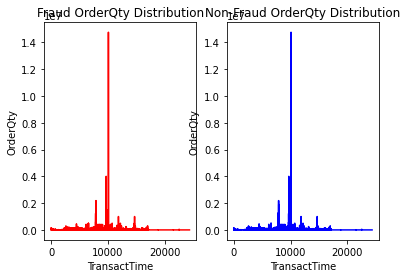

In [ ]:
# OrderQty distribution comparison (line plot)



plt.subplot(1, 2, 1)
plt.plot(df["OrderQty"], color="red")
plt.title("Fraud OrderQty Distribution")
plt.xlabel("TransactTime")
plt.ylabel("OrderQty")

plt.subplot(1, 2, 2)
plt.plot(df["OrderQty"], color="blue")
plt.title("Non-Fraud OrderQty Distribution")
plt.xlabel("TransactTime")
plt.ylabel("OrderQty")

plt.show()

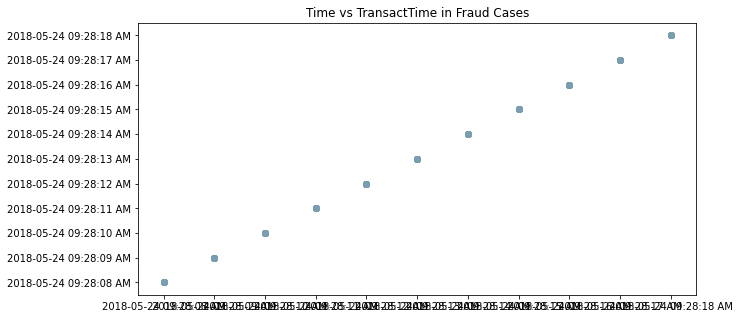

In [ ]:
# Time vs Amount in Fraud Cases

plt.figure(figsize=(10,5))
fig = plt.scatter(x=df[df['Fraud'] == 1]['TransactTime'], y=df[df['Fraud'] == 1]['TransactTime'], color="#7a9eaf")
plt.title("Time vs TransactTime in Fraud Cases")
plt.show()

In [ ]:
#plt.figure(figsize=(10,5))
#fig = plt.scatter(x=df[df['Fraud'] == 0]['TransactTime'], y=df[df['Fraud'] == 0]['orderId'], color="#655989")
#plt.title("Time vs orderId in Legit Cases")
#plt.show()

In [ ]:
#plt.figure(figsize=(12, 6))
#plt.title('Total Monthly transaction by ordStatus')
#sns.countplot(df['orderId'], hue = df.ordStatus_numerical)

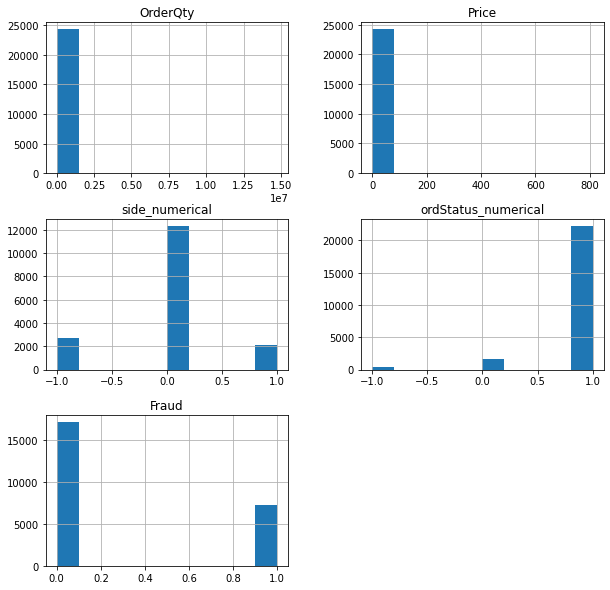

In [ ]:
#histogram of the data set

df.hist(figsize=(10,10))
plt.show()

# **Testing DataSet Cleaning**

In [ ]:
del testing_Data['Account']
del testing_Data['Symbol']
del testing_Data['LastShares']
del testing_Data['LastPx']
del testing_Data ['lastMkt']
del testing_Data['timeStamp']
del testing_Data ['MsgSeqNum']
del testing_Data['Cancelled']

In [ ]:
testing_Data

,SenderSubId,orderId,ordStatus,side,OrderQty,Price,TransactTime,Fraud
0,JTPOINT,7508,CANCELED,Sell,500.000000,25.802124,2018-05-24 09:29:16 AM,1
1,JTPOINT,7509,CANCELED,Sell,500.000000,25.802124,2018-05-24 09:29:16 AM,1
2,JTPOINT,7510,CANCELED,Sell,500.000000,25.802124,2018-05-24 09:29:16 AM,1
3,JTPOINT,7511,CANCELED,Sell,500.000000,25.802124,2018-05-24 09:29:16 AM,1
4,JTPOINT,7512,CANCELED,Sell,500.000000,25.802124,2018-05-24 09:29:16 AM,1
...,...,...,...,...,...,...,...,...
6316,JTMBINS,3955,CANCELED,Sell,491.600506,23.497166,2018-05-24 10:04:50 AM,1
6317,JTMBINS,3956,CANCELED,Sell,491.600506,23.497166,2018-05-24 10:04:50 AM,1
6318,JTMBINS,3957,CANCELED,Sell,491.600506,23.497166,2018-05-24 10:04:50 AM,1
6319,JTMBINS,3958,CANCELED,Sell,491.600506,23.497166,2018-05-24 10:04:50 AM,1


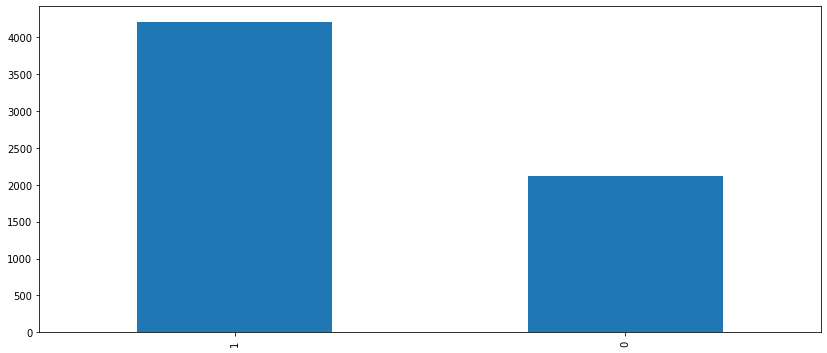

In [ ]:
ax=testing_Data['Fraud'].value_counts().plot(kind='bar',figsize=(14,6))

In [ ]:
#our Label
testing_Data.Fraud.value_counts(normalize=True)*100

1    66.476823
0    33.523177
Name: Fraud, dtype: float64

In [ ]:
testing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SenderSubId   6321 non-null   object 
 1   orderId       6321 non-null   object 
 2   ordStatus     6321 non-null   object 
 3   side          6321 non-null   object 
 4   OrderQty      6299 non-null   float64
 5   Price         6299 non-null   float64
 6   TransactTime  6321 non-null   object 
 7   Fraud         6321 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 395.2+ KB


In [ ]:
testing_Data. isna(). any()

SenderSubId     False
orderId         False
ordStatus       False
side            False
OrderQty         True
Price            True
TransactTime    False
Fraud           False
dtype: bool

In [ ]:
testing_Data.dropna(inplace=True)

In [ ]:
testing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6299 entries, 0 to 6320
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SenderSubId   6299 non-null   object 
 1   orderId       6299 non-null   object 
 2   ordStatus     6299 non-null   object 
 3   side          6299 non-null   object 
 4   OrderQty      6299 non-null   float64
 5   Price         6299 non-null   float64
 6   TransactTime  6299 non-null   object 
 7   Fraud         6299 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 442.9+ KB


# **Convet the testing dataset into numerical one **

In [ ]:
testing_Data["SenderSubId"] = testing_Data["SenderSubId"].astype('category')
testing_Data["orderId"] = testing_Data["orderId"].astype('category')
testing_Data["ordStatus"] = testing_Data["ordStatus"].astype('category')
testing_Data["side"] = testing_Data["side"].astype('category')
testing_Data["OrderQty"] = testing_Data["OrderQty"].astype('category')
testing_Data["Price"] = testing_Data["Price"].astype('category')

testing_Data['TransactTime']= pd.to_datetime(testing_Data['TransactTime'])

testing_Data["Fraud"] = testing_Data["Fraud"].astype('category')

In [ ]:
testing_Data["SenderSubId_num"] = testing_Data["SenderSubId"].cat.codes

testing_Data["orderId_num"] = testing_Data["orderId"].cat.codes
testing_Data['ordStatus_num']= testing_Data['ordStatus'].cat.codes
testing_Data["side_num"] = testing_Data["side"].cat.codes
testing_Data["OrderQty_num"] = testing_Data["OrderQty"].cat.codes
testing_Data["Price_num"] =testing_Data["Price"].cat.codes

testing_Data['TransactTime_num'] = pd.to_numeric(testing_Data['TransactTime'],errors='coerce')
#df['TransactTime_num']= df['TransactTime']

testing_Data["Fraud_num"] =testing_Data["Fraud"].cat.codes

In [ ]:
from matplotlib import dates as mdates
testing_Data['Transacttime_num'] = mdates.date2num(testing_Data['TransactTime'])

In [ ]:
cols_to_scale = ['SenderSubId_num','orderId_num','ordStatus_num','side_num','OrderQty_num','Price_num','TransactTime_num','Fraud_num']

In [ ]:
testing_df = pd.DataFrame(testing_Data, columns = ['SenderSubId_num', 'orderId_num', 'ordStatus_num', 'side_num', 'OrderQty_num', 'Price_num', 'TransactTime_num', 'Fraud_num'])

In [ ]:
testing_df

,SenderSubId_num,orderId_num,ordStatus_num,side_num,OrderQty_num,Price_num,TransactTime_num,Fraud_num
0,11,4330,0,3,6,1006,1527154156000000000,1
1,11,4331,0,3,6,1006,1527154156000000000,1
2,11,4333,0,3,6,1006,1527154156000000000,1
3,11,4334,0,3,6,1006,1527154156000000000,1
4,11,4335,0,3,6,1006,1527154156000000000,1
...,...,...,...,...,...,...,...,...
6316,9,3931,0,3,5,847,1527156290000000000,1
6317,9,3932,0,3,5,847,1527156290000000000,1
6318,9,3933,0,3,5,847,1527156290000000000,1
6319,9,3934,0,3,5,847,1527156290000000000,1


# **Converting our dataset into Numerical values**

In [ ]:
df["SenderSubId"] = df["SenderSubId"].astype('category')
df["orderId"] = df["orderId"].astype('category')
df["ordStatus"] = df["ordStatus"].astype('category')
df["side"] = df["side"].astype('category')
df["OrderQty"] = df["OrderQty"].astype('category')
df["Price"] = df["Price"].astype('category')
df['TransactTime']= pd.to_datetime(df['TransactTime'])
df["Fraud"] = df["Fraud"].astype('category')

In [ ]:
df["SenderSubId_num"] = df["SenderSubId"].cat.codes
df["orderId_num"] = df["orderId"].cat.codes
df['ordStatus_num']= df['ordStatus'].cat.codes
df["side_num"] = df["side"].cat.codes
df["OrderQty_num"] = df["OrderQty"].cat.codes
df["Price_num"] =df["Price"].cat.codes

df['TransactTime_num'] = pd.to_numeric(df['TransactTime'],errors='coerce')
#df['TransactTime_num']= df['TransactTime']

df["Fraud_num"] =df["Fraud"].cat.codes

In [ ]:
from matplotlib import dates as mdates
df['Transacttime_num'] = mdates.date2num(df['TransactTime'])

In [ ]:
cols_to_scale = ['SenderSubId_num','orderId_num','ordStatus_num','side_num','OrderQty_num','Price_num','TransactTime_num','Fraud_num']

In [ ]:
data_frame = pd.DataFrame(df, columns = ['SenderSubId_num', 'orderId_num', 'ordStatus_num', 'side_num', 'OrderQty_num', 'Price_num', 'TransactTime_num', 'Fraud_num'])

In [ ]:
data_frame

,SenderSubId_num,orderId_num,ordStatus_num,side_num,OrderQty_num,Price_num,TransactTime_num,Fraud_num
0,20,686,1,0,219,11,1527145200000000000,0
1,20,688,1,2,219,13,1527145200000000000,0
2,27,10525,1,1,70,78,1527145224000000000,0
3,20,689,1,0,241,10,1527145200000000000,0
4,20,691,1,0,75,101,1527145200000000000,0
...,...,...,...,...,...,...,...,...
24366,21,21075,1,3,5,1448,1527154098000000000,1
24367,21,21076,1,3,5,1448,1527154098000000000,1
24368,21,21077,1,3,5,1448,1527154098000000000,1
24369,21,21078,1,3,5,1448,1527154098000000000,1


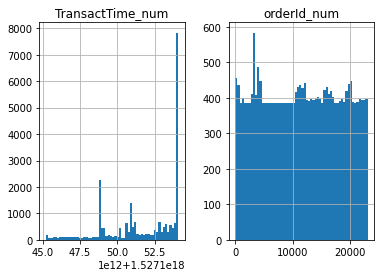

In [ ]:
# Genuine transactions
# 
data_frame.hist(column = ['TransactTime_num','orderId_num'], bins = 60)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


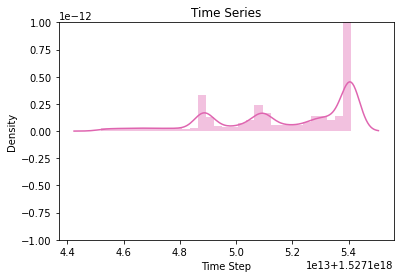

In [ ]:
# Plot number of datapoints of each time interval
sns.distplot(data_frame.TransactTime_num, color='#df65b0');
plt.title('Time Series')
plt.xlabel('Time Step'); plt.ylabel('Density');

# **Exploratory Analysis**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

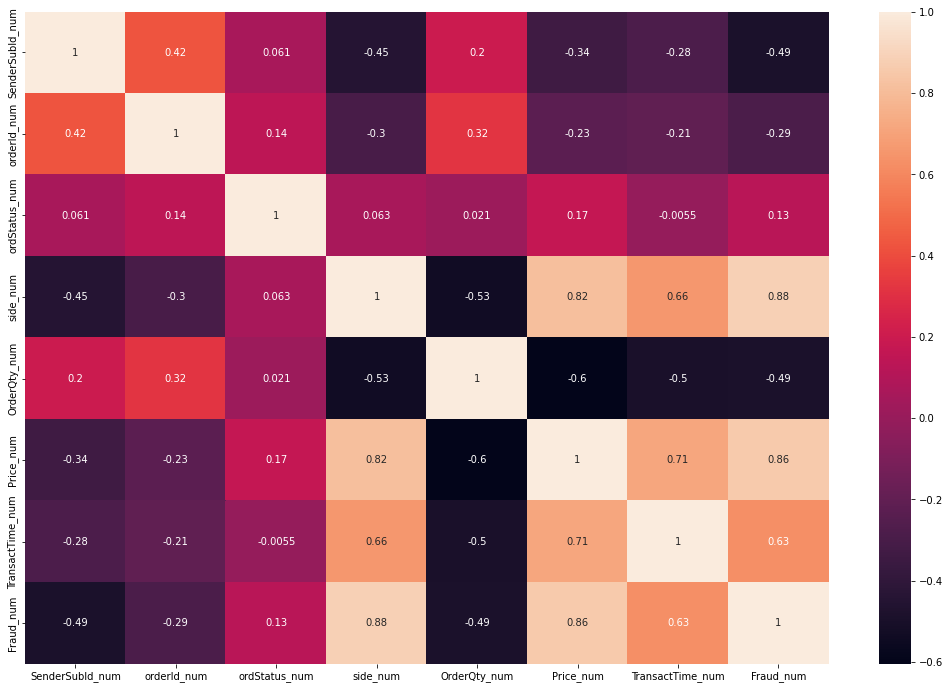

In [ ]:
# checking for correlations
plt.figure(figsize=(18,12))
sns.heatmap(data_frame.corr(), annot=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
data_frame.corr(method ='pearson')

,SenderSubId_num,orderId_num,ordStatus_num,side_num,OrderQty_num,Price_num,TransactTime_num,Fraud_num
SenderSubId_num,1.000000,0.424868,0.060780,-0.447415,0.203159,-0.336881,-0.284285,-0.489435
orderId_num,0.424868,1.000000,0.144416,-0.303447,0.322080,-0.226397,-0.206548,-0.290624
ordStatus_num,0.060780,0.144416,1.000000,0.063032,0.021335,0.170260,-0.005479,0.125793
side_num,-0.447415,-0.303447,0.063032,1.000000,-0.534747,0.817338,0.660758,0.881720
OrderQty_num,0.203159,0.322080,0.021335,-0.534747,1.000000,-0.604324,-0.496682,-0.488732
Price_num,-0.336881,-0.226397,0.170260,0.817338,-0.604324,1.000000,0.713589,0.860881
TransactTime_num,-0.284285,-0.206548,-0.005479,0.660758,-0.496682,0.713589,1.000000,0.627151
Fraud_num,-0.489435,-0.290624,0.125793,0.881720,-0.488732,0.860881,0.627151,1.000000


# **Models**

In [ ]:
#import Libraries for all the models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import metrics


from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score



In [ ]:
data_frame

,SenderSubId_num,orderId_num,ordStatus_num,side_num,OrderQty_num,Price_num,TransactTime_num,Fraud_num
0,20,686,1,0,219,11,1527145200000000000,0
1,20,688,1,2,219,13,1527145200000000000,0
2,27,10525,1,1,70,78,1527145224000000000,0
3,20,689,1,0,241,10,1527145200000000000,0
4,20,691,1,0,75,101,1527145200000000000,0
...,...,...,...,...,...,...,...,...
24366,21,21075,1,3,5,1448,1527154098000000000,1
24367,21,21076,1,3,5,1448,1527154098000000000,1
24368,21,21077,1,3,5,1448,1527154098000000000,1
24369,21,21078,1,3,5,1448,1527154098000000000,1


In [ ]:
X_train = data_frame.drop(['Fraud_num'], axis=1)
y_train = data_frame[['Fraud_num']]


In [ ]:
X_test= testing_df.drop(['Fraud_num'], axis=1)
y_test = testing_df[['Fraud_num']]

In [ ]:
print(X_train.shape)
print(y_train.shape)

(24311, 7)
(24311, 1)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(6299, 7)
(6299, 1)


In [ ]:
data_frame

,SenderSubId_num,orderId_num,ordStatus_num,side_num,OrderQty_num,Price_num,TransactTime_num,Fraud_num
0,20,686,1,0,219,11,1527145200000000000,0
1,20,688,1,2,219,13,1527145200000000000,0
2,27,10525,1,1,70,78,1527145224000000000,0
3,20,689,1,0,241,10,1527145200000000000,0
4,20,691,1,0,75,101,1527145200000000000,0
...,...,...,...,...,...,...,...,...
24366,21,21075,1,3,5,1448,1527154098000000000,1
24367,21,21076,1,3,5,1448,1527154098000000000,1
24368,21,21077,1,3,5,1448,1527154098000000000,1
24369,21,21078,1,3,5,1448,1527154098000000000,1


In [ ]:
testing_df

,SenderSubId_num,orderId_num,ordStatus_num,side_num,OrderQty_num,Price_num,TransactTime_num,Fraud_num
0,11,4330,0,3,6,1006,1527154156000000000,1
1,11,4331,0,3,6,1006,1527154156000000000,1
2,11,4333,0,3,6,1006,1527154156000000000,1
3,11,4334,0,3,6,1006,1527154156000000000,1
4,11,4335,0,3,6,1006,1527154156000000000,1
...,...,...,...,...,...,...,...,...
6316,9,3931,0,3,5,847,1527156290000000000,1
6317,9,3932,0,3,5,847,1527156290000000000,1
6318,9,3933,0,3,5,847,1527156290000000000,1
6319,9,3934,0,3,5,847,1527156290000000000,1


# **KNN**

In [ ]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as roc
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

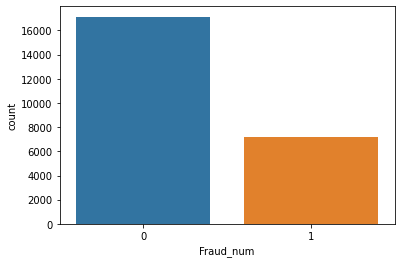

In [ ]:
#visualize the target class 'target_num'
sns.countplot(x='Fraud_num', data=data_frame)

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_pred_knn=knn_model.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_knn))

0.6670900142879822


In [ ]:
print(classification_report(y_test, y_pred_knn))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2097
           1       0.67      1.00      0.80      4202

    accuracy                           0.67      6299
   macro avg       0.33      0.50      0.40      6299
weighted avg       0.45      0.67      0.53      6299



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 15.0, 'Predicted Label')

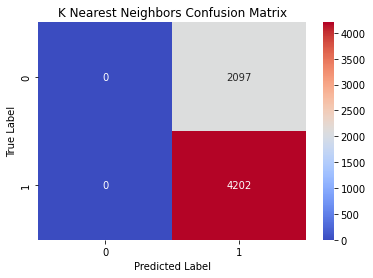

In [ ]:
# confusion matrix
knn_cm = confusion_matrix(y_test,y_pred_knn)

ax = sns.heatmap(knn_cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('K Nearest Neighbors Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#print("X and y sizes, respectively:", len(X), len(y))
#print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
#print("Total number of frauds:", len(y.loc[data_frame['Fraud_num'] == 1]), len(y.loc[data_frame['Fraud_num'] == 1])/len(y))
#print("Number of frauds on y_test:", len(y_test.loc[testing_df['Fraud_num'] == 1]), '-- en pourcentage:',len(y_test.loc[testing_df['Fraud_num'] == 1]) / len(y_test))
#print("Number of frauds on y_train:", len(y_train.loc[data_frame['Fraud_num'] == 1]), '--en pourcentage:' len(y_train.loc[data_frame['Fraud_num'] == 1])/len(y_train))

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
pred_logReg = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,pred_logReg)

0.99952373392602

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Text(0.5, 15.0, 'Predicted Label')

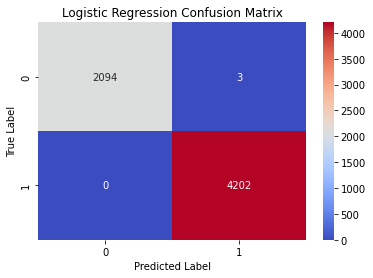

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test,pred_logReg)

ax = sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

# **SVM**

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score

In [ ]:
classifier= svm.SVC(C=1,kernel='sigmoid',random_state=42)

In [ ]:
#Fit into Model
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='sigmoid', random_state=42)

In [ ]:
#Predict the class using X_test
predictions_SVM = classifier.predict(X_test)

In [ ]:
con_mat = confusion_matrix(y_test, predictions_SVM)
average_precision = average_precision_score(y_test, predictions_SVM)
cls_report = classification_report(y_test, predictions_SVM)

In [ ]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,predictions_SVM))
#precision score
print("precision:", metrics.precision_score(y_test,predictions_SVM))
#recall score
print("recall" , metrics.recall_score(y_test,predictions_SVM))
print(metrics.classification_report(y_test, predictions_SVM))

acuracy: 0.9190347674234005
precision: 0.8917657045840407
recall 1.0
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      2097
           1       0.89      1.00      0.94      4202

    accuracy                           0.92      6299
   macro avg       0.95      0.88      0.90      6299
weighted avg       0.93      0.92      0.92      6299



Text(0.5, 15.0, 'Predicted Label')

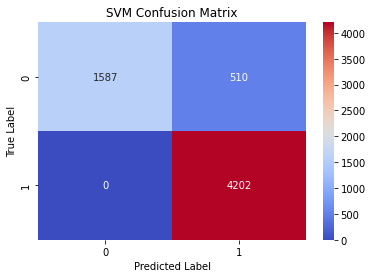

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test,predictions_SVM)

ax = sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('SVM Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

In [ ]:
#import matplotlib.pyplot as plt
#from sklearn import model_selection
#from sklearn import preprocessing
#from sklearn import svm
#from sklearn import metrics

In [ ]:
#classifier=svm.SVC(kernel='poly',degree=10)

In [ ]:
#classifier.fit(X_train, y_train)

In [ ]:
#y_test_pred=classifier.decision_function(X_test)

In [ ]:
#C_range=np.logspace(-2,3,6) #choix de 6 valeurs de c entre 10**-2 et 10**3

#param_grid={'C':C_range} #grille de params
#score='roc_auc' #critére de selection du meilleur modéle
#initialiser une recherche sur grille
#grid=model_selection.GridSearchCV(svm.SVC(kernel='poly'),param_grid,cv=5, #on fait la validation des params 5 fois
                                                          # scoring=score)

In [ ]:
#grid.fit(X_train,y_train) # faire tourner la recherche sur la grille
#print("la valeur optimal est %s avec un score de %.2f" % \
 #   (grid.best_params_,grid.best_score_)) #afficher les params optimaux

In [ ]:
#rom sklearn.metrics import classification_report,confusion_matrix
#print(confusion_matrix(y_test,y_test_pred))

In [ ]:
#print(classification_report(y_test,y_test_pred))
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test, y_test_pred)

In [ ]:
# confusion matrix
#clf= confusion_matrix(y_test,predictions)

#ax = sns.heatmap(clf,annot=True,cmap='coolwarm',fmt='.0f')
#ax.set_title('SVM Confusion Matrix')
#ax.set_ylabel('True Label')
#ax.set_xlabel('Predicted Label')

# **random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score



In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,random_state=10)

In [ ]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=10)

In [ ]:
y_pred_random=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random))

Accuracy: 0.9676139069693602


In [ ]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2097
           1       1.00      0.95      0.98      4202

    accuracy                           0.97      6299
   macro avg       0.96      0.98      0.96      6299
weighted avg       0.97      0.97      0.97      6299



Text(0.5, 15.0, 'Predicted Label')

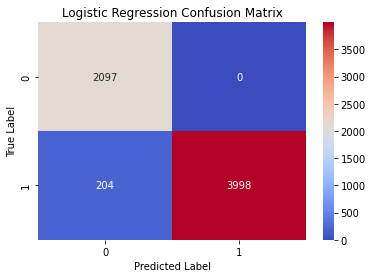

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred_random)

ax = sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

# **Gradient Boost Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=200,max_features=6, max_depth=10, random_state=0)

In [ ]:
gb_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=10, max_features=6, n_estimators=200,
                           random_state=0)

In [ ]:
pred_gradient=gb_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_gradient))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2097
           1       1.00      1.00      1.00      4202

    accuracy                           1.00      6299
   macro avg       1.00      1.00      1.00      6299
weighted avg       1.00      1.00      1.00      6299



# **AdaBoost **

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,learning_rate=0.1)

In [ ]:
# Train Adaboost Classifer
model_abc = abc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Predict the response for test dataset
y_pred_boost = model_abc.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_boost))

Accuracy: 1.0


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#using decision tree
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="gini", random_state=0,max_depth=3) 

In [ ]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
DT_pred = DT_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,DT_pred)

1.0

Text(0.5, 15.0, 'Predicted Label')

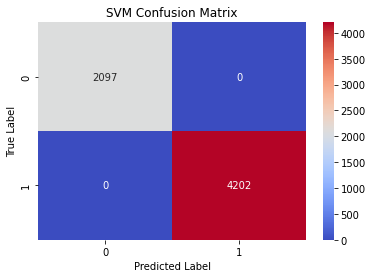

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test,DT_pred)

ax = sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('SVM Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

# **XGBOOST**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [ ]:
y_pred_XGBOOST = model.predict(X_test)

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_XGBOOST)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


# **Neural Network ANN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [ ]:
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

In [ ]:
#Initialising ANN
#ann = keras.models.Sequential()

In [ ]:
 #Adding First Hidden Layer
#ann.add(keras.layers.Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
#BatchNormalization(),
#ann.add(keras.layers.Dense(units=6,activation="relu"))
#Adding Output Layer
#BatchNormalization(),
#ann.add(keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
#Compiling ANN
#ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

In [ ]:
callbacks= [
            
            EarlyStopping(monitor='accuracy', patience=10, verbose=1)
           ]

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
keras.layers.BatchNormalization()
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 7,kernel_regularizer=regularizers.l2(0.1)))

# Adding the second hidden layer
keras.layers.BatchNormalization()
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu',kernel_regularizer=regularizers.l2(0.1)))

# Adding the output layer
keras.layers.BatchNormalization()
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.1)))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



# Fitting the ANN to the Training set
result= classifier.fit(X_train, y_train, batch_size = 8, callbacks=callbacks, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
3039/3039 [==============================] - 7s 2ms/step - loss: 0.5210 - accuracy: 0.9207 - val_loss: 0.7073 - val_accuracy: 0.9768
Epoch 2/100
3039/3039 [==============================] - 6s 2ms/step - loss: 0.4864 - accuracy: 0.9861 - val_loss: 0.6906 - val_accuracy: 0.9509
Epoch 3/100
3039/3039 [==============================] - 6s 2ms/step - loss: 0.4854 - accuracy: 0.9838 - val_loss: 0.6837 - val_accuracy: 0.9379
Epoch 4/100
3039/3039 [==============================] - 6s 2ms/step - loss: 0.4855 - accuracy: 0.9828 - val_loss: 0.6853 - val_accuracy: 0.9216
Epoch 5/100
3039/3039 [==============================] - 6s 2ms/step - loss: 0.4853 - accuracy: 0.9829 - val_loss: 0.7152 - val_accuracy: 0.9413
Epoch 6/100
3039/3039 [==============================] - 6s 2ms/step - loss: 0.4853 - accuracy: 0.9824 - val_loss: 0.7179 - val_accuracy: 0.9573
Epoch 7/100
3039/3039 [==============================] - 6s 2ms/step - loss: 0.4853 - accuracy: 0.9826 - val_loss: 0.6785 - val_ac

In [ ]:
# Predicting the Test set results
y_pred_ANN = classifier.predict(X_test)
y_pred = (y_pred_ANN > 0.5)

In [ ]:
score = classifier.evaluate(X_test, y_test)
score

197/197 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.9413


[0.6811414957046509, 0.9412605166435242]

Text(0.5, 15.0, 'Predicted Label')

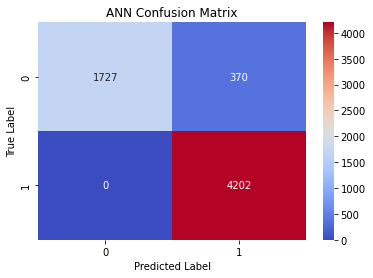

In [ ]:
# confusion matrix
cm= confusion_matrix(y_test,y_pred)

ax = sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('ANN Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


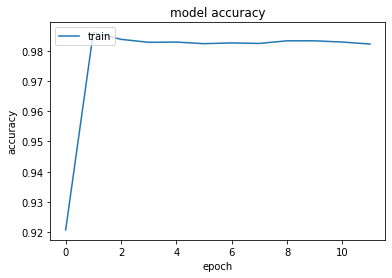

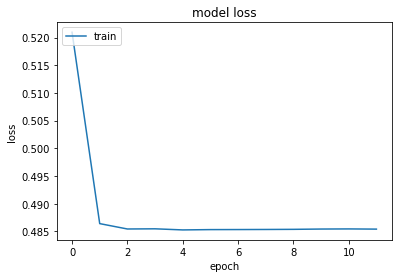

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(result.history.keys())
# summarize history for accuracy
plt.plot(result.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# **XGBoost**

In [ ]:
from xgboost import XGBClassifier # XGBoost algorithm

In [ ]:
xgb = XGBClassifier(max_depth = 100)

In [ ]:
xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(max_depth=100)

In [ ]:
xgb_yhat = xgb.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, xgb_yhat))

Accuracy: 1.0
